### k-means clustering in R

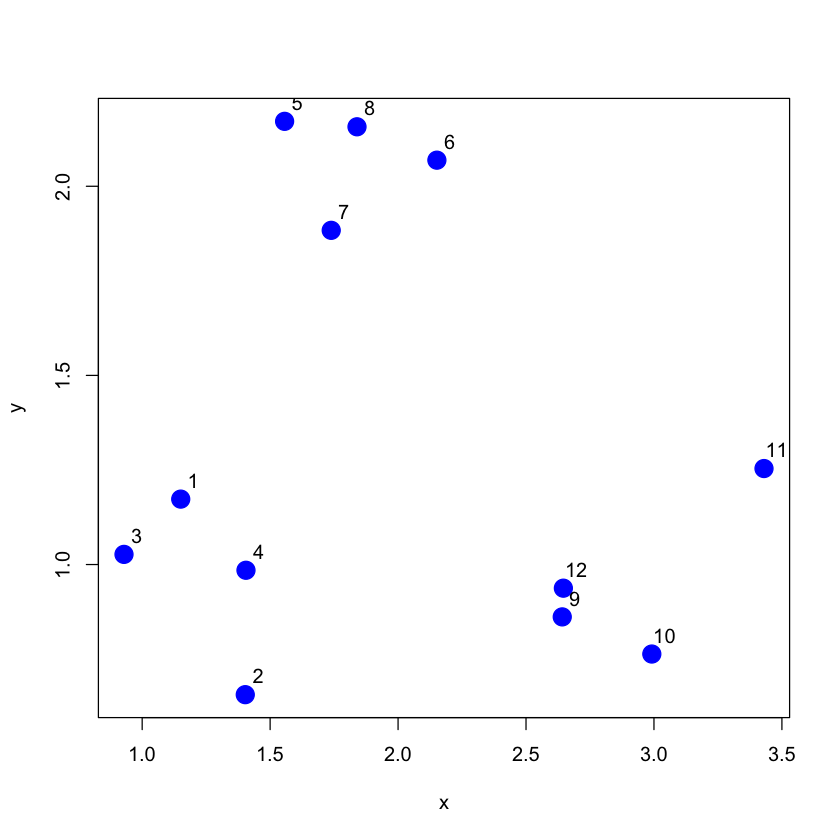

In [1]:
# Simulate data with three clusters
set.seed(666)
x <- rnorm(12, rep(1:3, each = 4), 0.2)
y <- rnorm(12, rep(c(1, 2, 1), each = 4), 0.2)
plot(x, y, col = "blue", pch = 19, cex = 2)
text(x + 0.05, y + 0.05, labels = as.character(1:12))

In [2]:
# Create the k-means model: km.out
# input data: one observation per row, one feature per column
km.out <- kmeans(x, centers = 3, nstart = 20)

# Inspect the result
summary(km.out)

# Print the cluster membership component of the model
km.out$cluster

# Print the km.out object
km.out

             Length Class  Mode   
cluster      12     -none- numeric
centers       3     -none- numeric
totss         1     -none- numeric
withinss      3     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          3     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric

[1] 1 1 1 1 1 3 3 3 2 2 2 2

K-means clustering with 3 clusters of sizes 5, 4, 3

Cluster means:
      [,1]
1 1.288953
2 2.927277
3 1.909979

Clustering vector:
 [1] 1 1 1 1 1 3 3 3 2 2 2 2

Within cluster sum of squares by cluster:
[1] 0.24694987 0.41765719 0.09270178
 (between_SS / total_SS =  88.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

### k-means has a random component
Because of the random initialization of the k-means algorithm, there's quite some variation in cluster assignments among the six models.

### Select models from random initializations using "within cluster sum of squares error"
- Best model is based on total within cluster sum of squares:
    - For each cluster
        - For each observation in the cluster
            - Determine squared distance from observation to cluster center
    - Sum all of them together

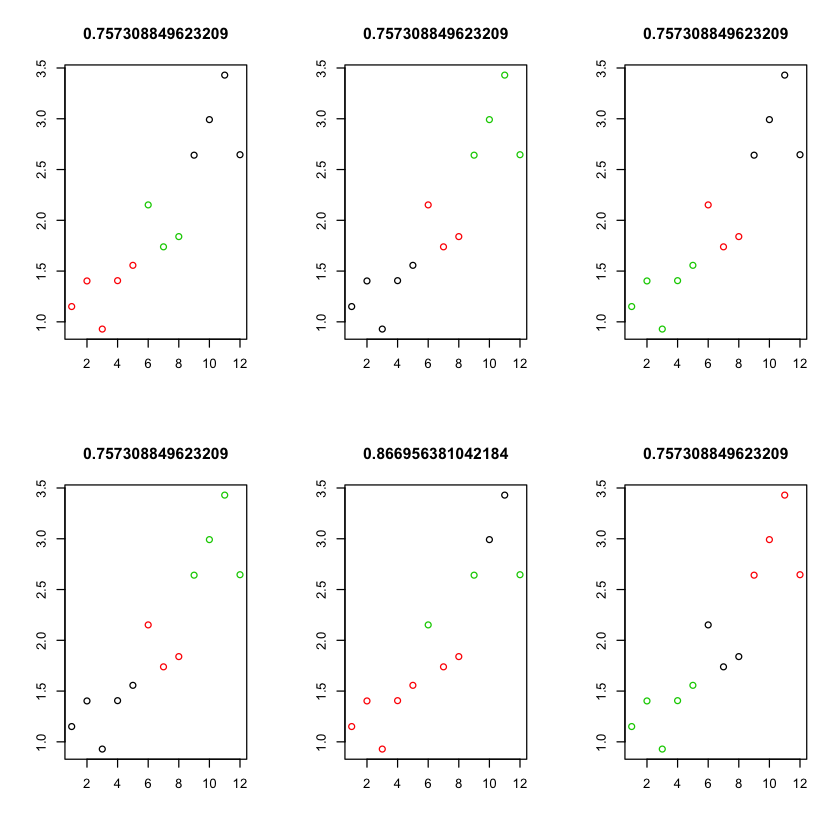

In [3]:
# Set up 2 x 3 plotting grid
par(mfrow = c(2, 3))

# Set seed
set.seed(1)

for(i in 1:6) {
  # Run kmeans() on x with three clusters and one start
  km.out <- kmeans(x, centers = 3, nstart = 1)
  
  # Plot clusters
  plot(x, col = km.out$cluster, 
       main = km.out$tot.withinss, 
       xlab = "", ylab = "")
}

### Determine number of clusters
1. If you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, you can observe how a measure of model quality changes with the number of clusters.
2. The ideal plot will have an elbow where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the elbow indicates the number of clusters inherent in the data.

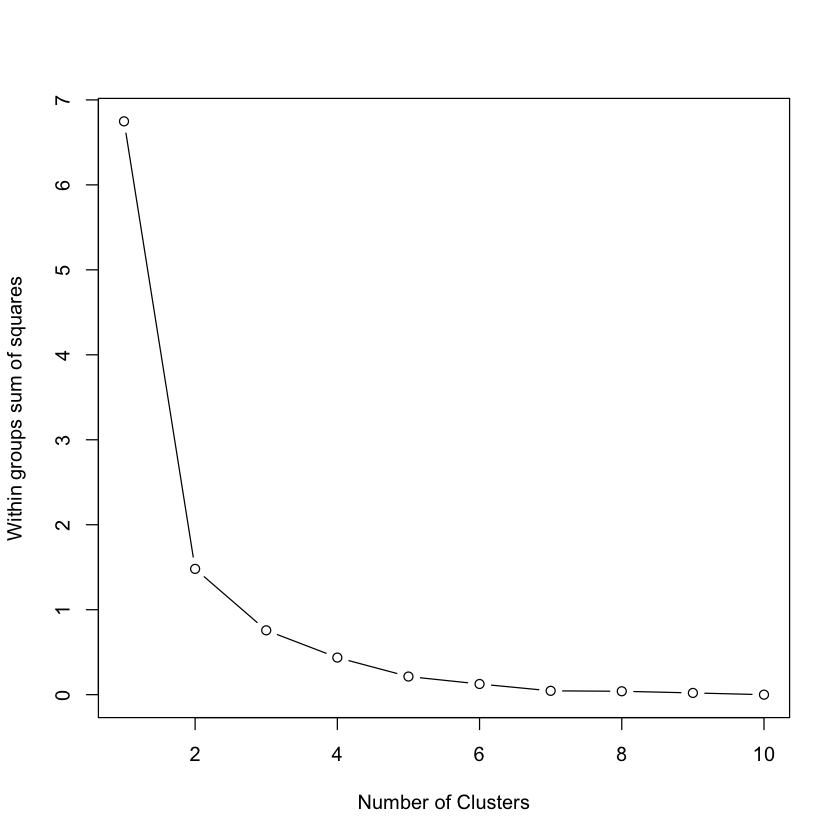

In [7]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:10) {
  km.out <- kmeans(x, centers = i, nstart = 10)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:10, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

# Looking at the scree plot below, it looks like there are inherently 2 or 3 clusters in the data.